In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],['type'])

id ['type']
station ['type']
date ['type']
prcp ['type']
tobs ['type']


In [14]:
columns_two = inspector.get_columns('station')
for c in columns_two:
    print(c['name'],['type'])

id ['type']
station ['type']
name ['type']
latitude ['type']
longitude ['type']
elevation ['type']


In [15]:
session.query(Measurement.id, Measurement.station, Measurement.prcp, Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-23').all()

[(2365, 'USC00519397', 0.08, '2016-08-24', 79.0),
 (2366, 'USC00519397', 0.08, '2016-08-25', 80.0),
 (2367, 'USC00519397', 0.0, '2016-08-26', 79.0),
 (2368, 'USC00519397', 0.0, '2016-08-27', 77.0),
 (2369, 'USC00519397', 0.01, '2016-08-28', 78.0),
 (2370, 'USC00519397', 0.0, '2016-08-29', 78.0),
 (2371, 'USC00519397', 0.0, '2016-08-30', 79.0),
 (2372, 'USC00519397', 0.13, '2016-08-31', 80.0),
 (2373, 'USC00519397', 0.0, '2016-09-01', 81.0),
 (2374, 'USC00519397', 0.0, '2016-09-02', 80.0),
 (2375, 'USC00519397', 0.0, '2016-09-03', 79.0),
 (2376, 'USC00519397', 0.03, '2016-09-04', 75.0),
 (2377, 'USC00519397', None, '2016-09-05', 79.0),
 (2378, 'USC00519397', None, '2016-09-06', 76.0),
 (2379, 'USC00519397', 0.05, '2016-09-07', 76.0),
 (2380, 'USC00519397', 0.0, '2016-09-08', 80.0),
 (2381, 'USC00519397', 0.03, '2016-09-09', 79.0),
 (2382, 'USC00519397', 0.0, '2016-09-10', 78.0),
 (2383, 'USC00519397', 0.05, '2016-09-11', 76.0),
 (2384, 'USC00519397', 0.0, '2016-09-12', 78.0),
 (2385, 'U

In [16]:
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [17]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [18]:
print(dt.date.today())

2018-10-18


# Exploratory Climate Analysis

In [19]:
#latest date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [20]:
query_date = dt.date(2016,8,23)
print("Query Date:", query_date)

Query Date: 2016-08-23


In [21]:
#trying to pull 12 months of data, confused though because the datae doesn't go to current date
#also, why is it pulling in this way?
annualprecip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <'2017-08-23').\
    filter(Measurement.date > query_date).order_by(Measurement.date.desc()).all()
annualprecip

[('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017

In [22]:
last_data_date = dt.date(2017,8,23)

In [23]:
#query to find the date 1 year ago from the last data point in the database
year_ago = last_data_date-dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [24]:
session.query(Measurement.station).filter(Measurement.station == 'USC00511918').all()

[('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC00511918'),
 ('USC0051

In [25]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date.desc()).all()

In [26]:
dates = [result[0] for result in results[:365]]
prcps = [result[1] for result in results[:365]]

In [27]:
prcps

[0.0,
 0.0,
 0.08,
 0.45,
 0.0,
 0.0,
 0.5,
 0.0,
 0.02,
 None,
 0.56,
 0.0,
 0.01,
 None,
 0.0,
 0.0,
 None,
 0.09,
 0.0,
 0.0,
 0.06,
 None,
 0.0,
 0.05,
 0.01,
 0.13,
 0.0,
 0.07,
 0.12,
 0.42,
 0.02,
 0.0,
 0.06,
 0.32,
 0.42,
 0.0,
 0.01,
 0.08,
 0.0,
 0.22,
 0.0,
 None,
 0.0,
 0.0,
 None,
 0.0,
 0.0,
 0.14,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.15,
 0.0,
 0.1,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.06,
 None,
 0.02,
 0.04,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.06,
 0.0,
 0.05,
 0.0,
 0.25,
 0.02,
 0.12,
 0.0,
 None,
 0.0,
 0.0,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.06,
 0.02,
 0.0,
 0.23,
 0.3,
 0.0,
 0.13,
 0.14,
 0.01,
 0.0,
 0.09,
 0.4,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.01,
 0.0,
 0.0,
 0.06,
 0.02,
 None,
 0.0,
 0.12,
 0.3,
 0.0,
 0.03,
 0.12,
 0.0,
 0.05,
 0.11,
 0.3,
 0.05,
 0.58,
 1.19,
 None,
 0.61,
 0.84,
 0.0,
 0.06,
 0.07,
 0.2,
 0.8,
 0.03,
 0.07,
 0.12,
 0.0,
 0.2,
 4.0,
 0

In [28]:
test_df = pd.DataFrame(results,columns=['Dates', 'Precipitation'])
test_df.head(10)

,Dates,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


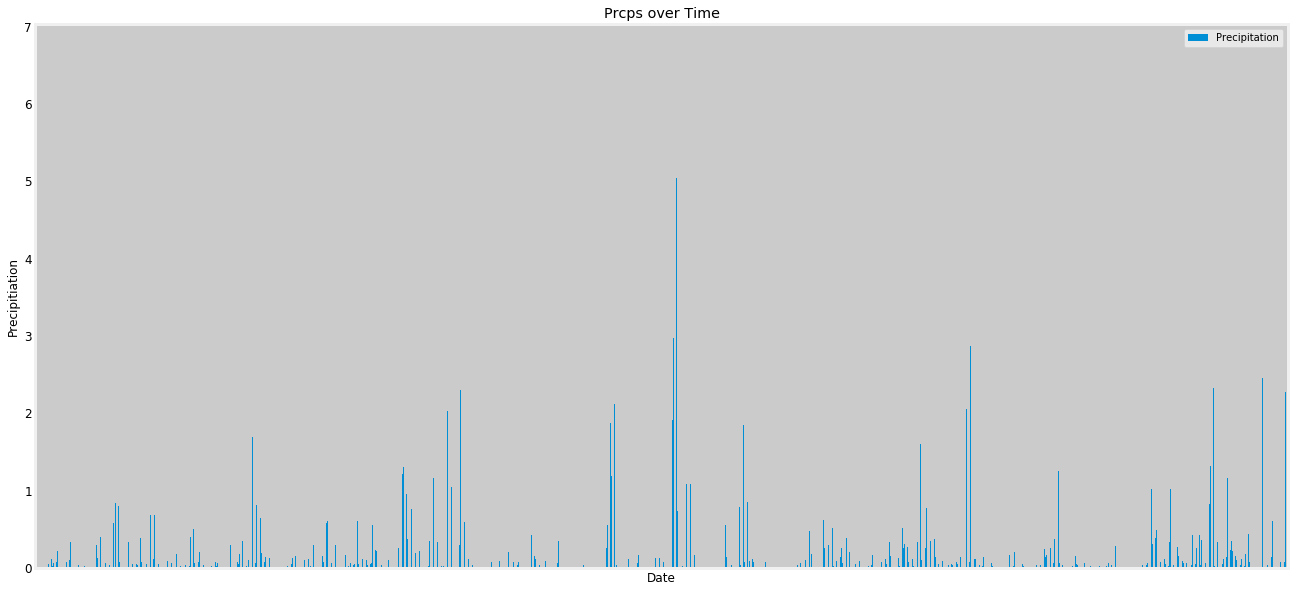

In [29]:
ax = test_df.plot(kind="bar", title="Prcps over Time", figsize = (20,10), legend =True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitiation", fontsize=12)
width= 50
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are of
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

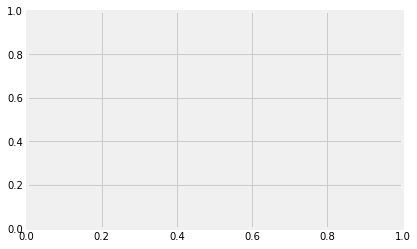

In [30]:
fig,ax = plt.subplots()
y_pos = range(1,len(prcps)+1)
ax.bar(y_pos,prcps,align="center", alpha=.5)
ax.set_xlabel("Dates")
ax.set_ylabel("Precip")
fig.tight_layout()
plt.show()

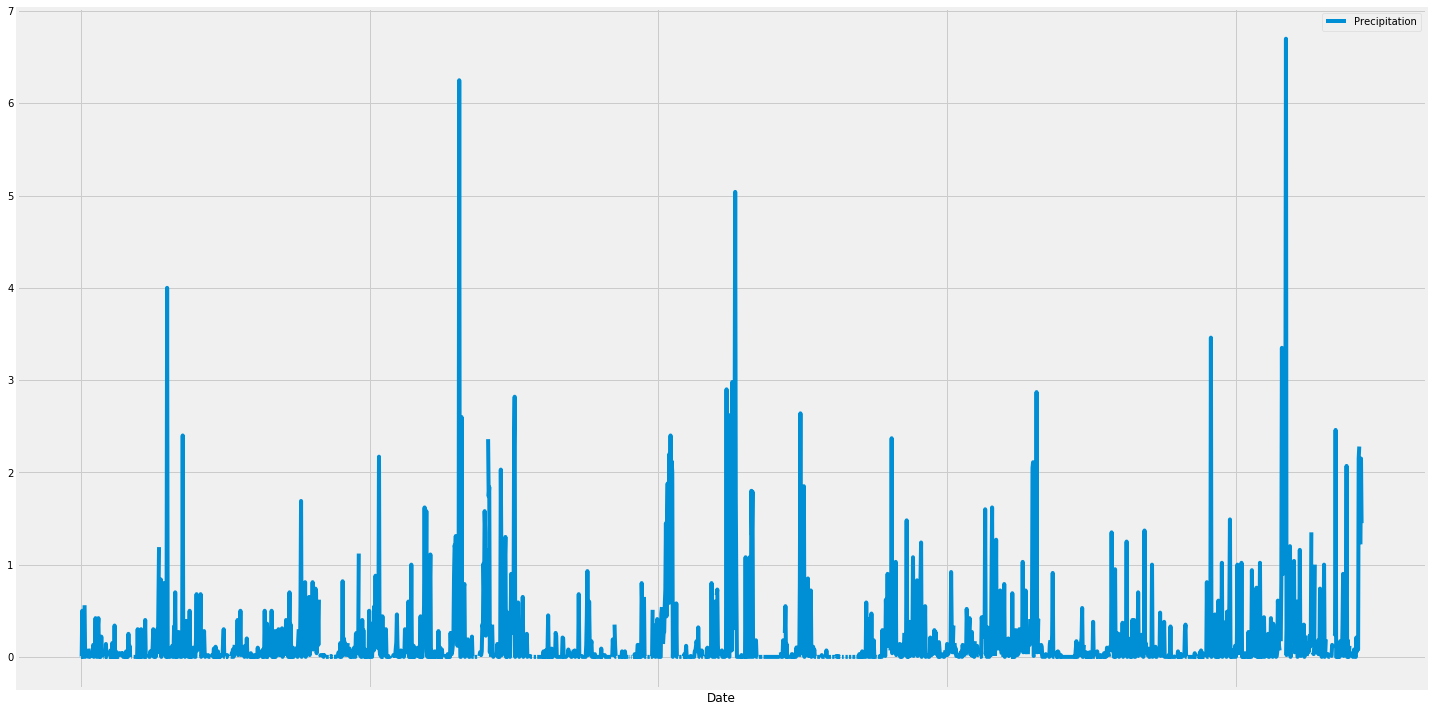

In [31]:
preci_df = pd.DataFrame(annualprecip,columns=["Date", "Precipitation"])
preci_df.set_index('Date',inplace=True)
width = 35
#preci_df.plot.bar()
preci_df.plot(figsize=(20,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are of
plt.tight_layout()
plt.show()


In [32]:
preci_df.describe()

,Precipitation
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [33]:
#this is a query to find the amount of stations available in the dataset
stationcount = session.query(Measurement.station).group_by(Measurement.station).count()
stationcount

9

In [44]:
#this gets the count of IDs but not in descending order some reason, EXPLORE
sel = [Measurement.station,
      func.count(Measurement.id)]
actives = session.query(*sel).group_by(Measurement.station).\
          order_by(func.count(Measurement.id).desc()).all()
actives

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
#this query grabs the low, high avg temps for the high count station
seltwo=[Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]

temps = session.query(*seltwo).filter(Measurement.station == 'USC00519281').\
        order_by(Measurement.station).all()
temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [50]:
#filters for last year, notice some stations drop out
selthree=[Measurement.date, Measurement.tobs]
annualtemps = session.query(*selthree).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.station).all()
annualtemps

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [51]:
temps_df = pd.DataFrame(annualtemps)


In [52]:
bins = [0,50,55,60,65,70,75,80,85,90,95,100]
names = ["<50", "55", "60", "65", "70", "75", "80", "85", "90", "95", ">100"]
temps_df["bin"] = pd.cut(temps_df["tobs"], bins, labels = names)
temps_df.head()

,date,tobs,bin
0,2016-08-24,77.0,80
1,2016-08-25,80.0,80
2,2016-08-26,80.0,80
3,2016-08-27,75.0,75
4,2016-08-28,73.0,75


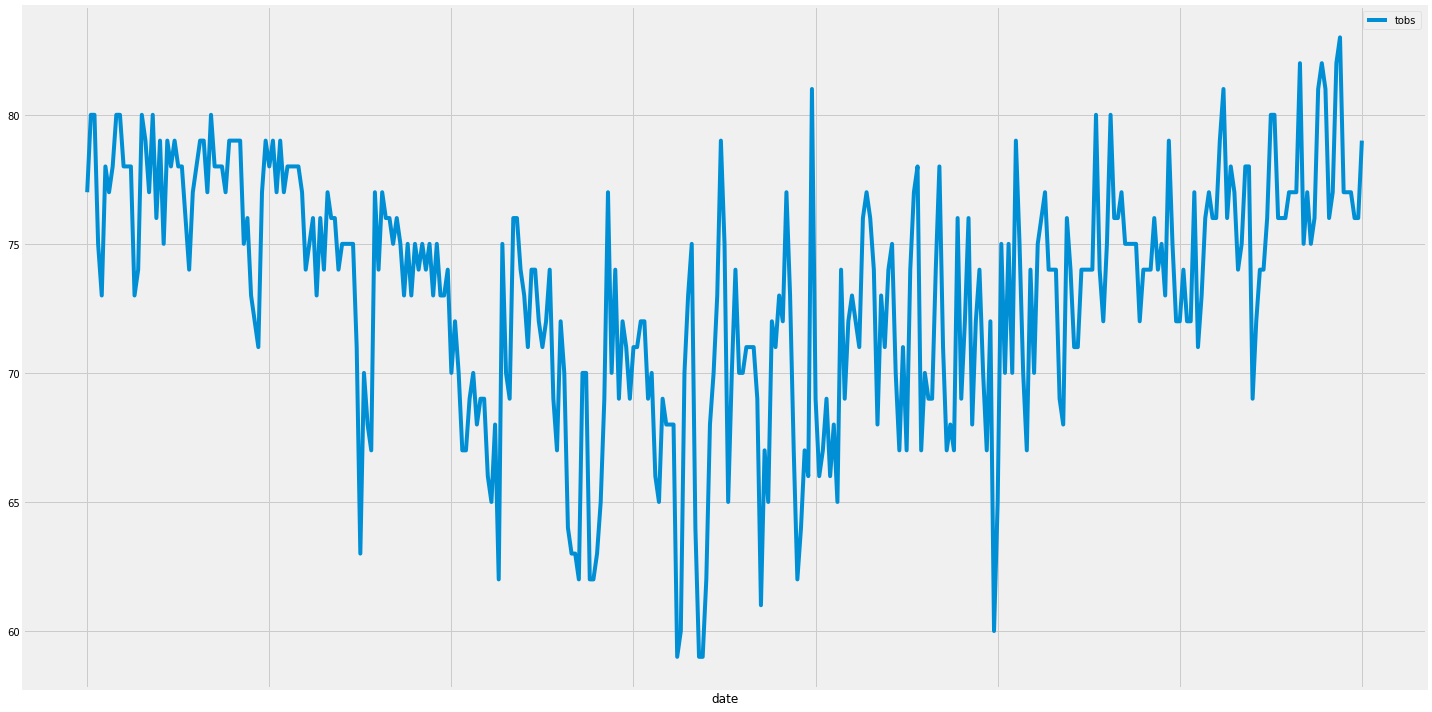

In [53]:
temps_df.set_index('date',inplace=True)
width = 35
temps_df.plot(figsize=(20,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are of
plt.tight_layout()
plt.show()

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [54]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [91]:
def avg_temp (start_date, end_date):

    return session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.date>=start_date).\
            filter(Measurement.date <= end_date).all()

In [95]:
avgtemperatures = (avg_temp('2017-06-25', '2017-07-07'))
print(avgtemperatures)

[(77.78205128205128,)]


In [97]:
for item in avgtemperatures:
    int(item)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'result'

In [86]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = (calc_temps('2017-06-25', '2017-07-07'))
print(trip_temps)

[(71.0, 77.78205128205128, 87.0)]


In [102]:
average_temp = trip_temps[0][1]

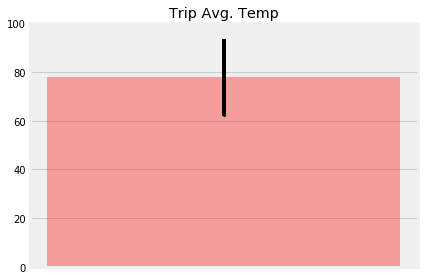

In [126]:
fig,ax = plt.subplots()
error = ((trip_temps[0][2])-(trip_temps[0][0]))

x = len(trip_temps)
ax.bar(x, average_temp , width = 1, yerr = error, alpha = .35, color = "red", ecolor = "black", capsize =1)
ax.set_title("Trip Avg. Temp")
ax.grid(False)
ax.set_xticks([])
ax.set_ylim(0,100)
ax.yaxis.grid()
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


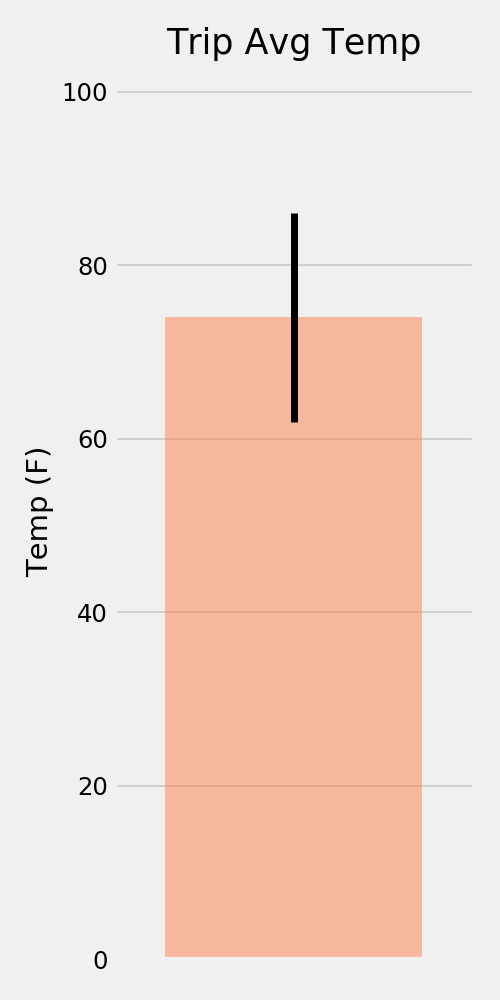

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


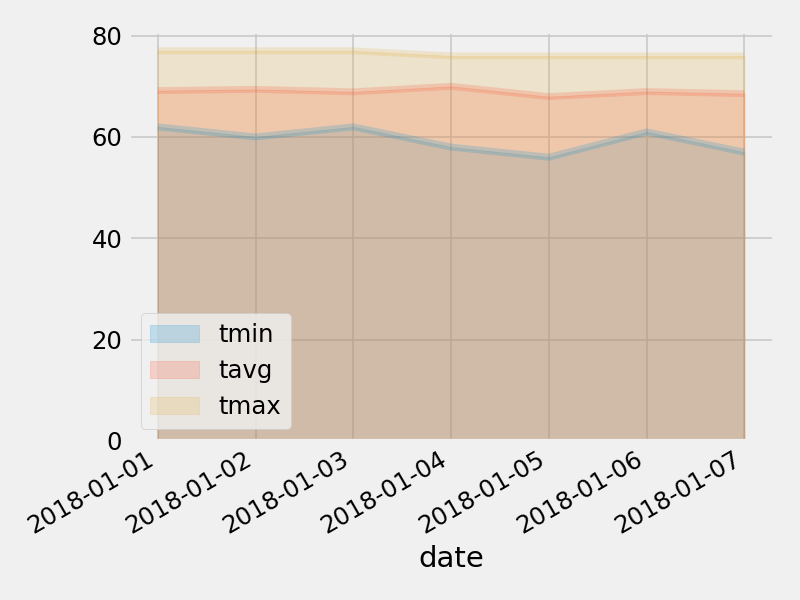

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
